##Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

import pickle
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

In [ ]:
!pip install plotly

In [ ]:
!pip install --upgrade plotly
!pip install jupyter-dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 32.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.8 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.7
    Uninstalling Werkzeug-2.3.7:
      Successfully uninstalled Werkzeug-2.3.7


##Data Load

In [ ]:
df_load = pd.read_csv('Telco-Customer-Churn.csv')

df_load.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_load.shape

(7043, 21)

In [ ]:
df_load.customerID.nunique()

7043

all CustomerID are unique

In [ ]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


TotalCharges values have object DType (must me float64)

In [ ]:
df_load['TotalCharges'] = pd.to_numeric(df_load['TotalCharges'], errors='coerce')
#errors='coerce' is used to convert any non-numeric values to NaN

In [ ]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df_load.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df_load[df_load['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


##Explanatory Data Analysis

In [ ]:
#churn distribution
fig = px.bar(df_load,
             x = 'Churn',
             color = 'gender',
             barmode = 'group')

fig.update_traces(dict(marker_line_width=0)) #removing outlines, makes bar clearer

fig.show()

###Numerical Variable EDA

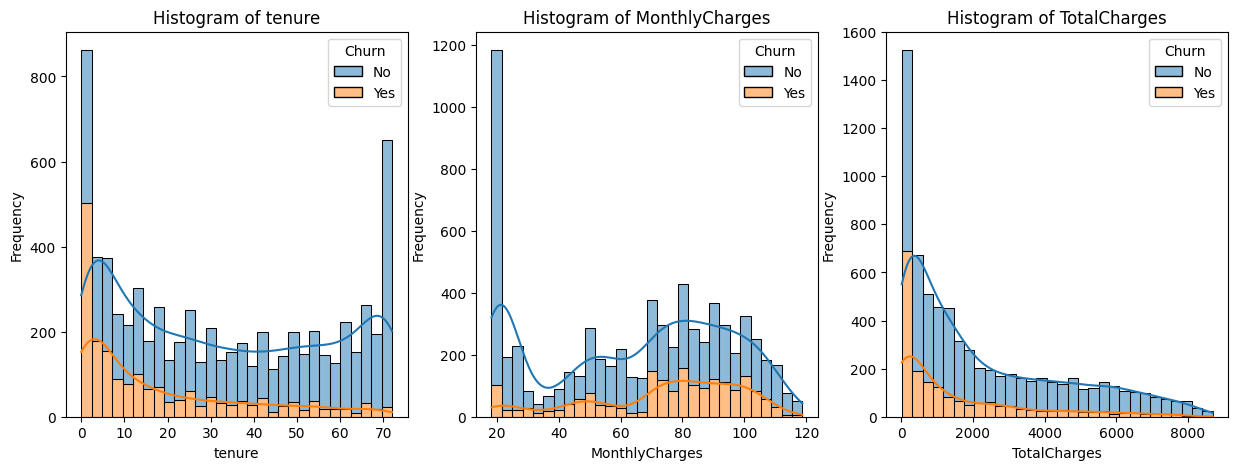

In [ ]:
# Set up the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterate over the columns and create histograms in the subplots
for idx, column in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    sns.histplot(data = df_load,
                 x = column,
                 bins = 30,
                 hue = 'Churn',
                 ax = axes[idx],
                 multiple='stack',
                 kde = True)

    axes[idx].set_title(f'Histogram of {column}')
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Frequency')
plt.show()

* tenure : lower the tenure, higher chance of Churn
* MonthlyCharges : highest Churn chance occurs at 70-100
* TotalCharges : lower the TotalCharges, higher chance of Churn

##Categorical EDA

In [ ]:
categorical = df_load.columns.tolist()

remove = ['customerID',
          'tenure',
          'MonthlyCharges',
          'TotalCharges',
          'Churn']

for remove in remove :
  if remove in categorical :
    categorical.remove(remove)

categorical

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
len(categorical)

16

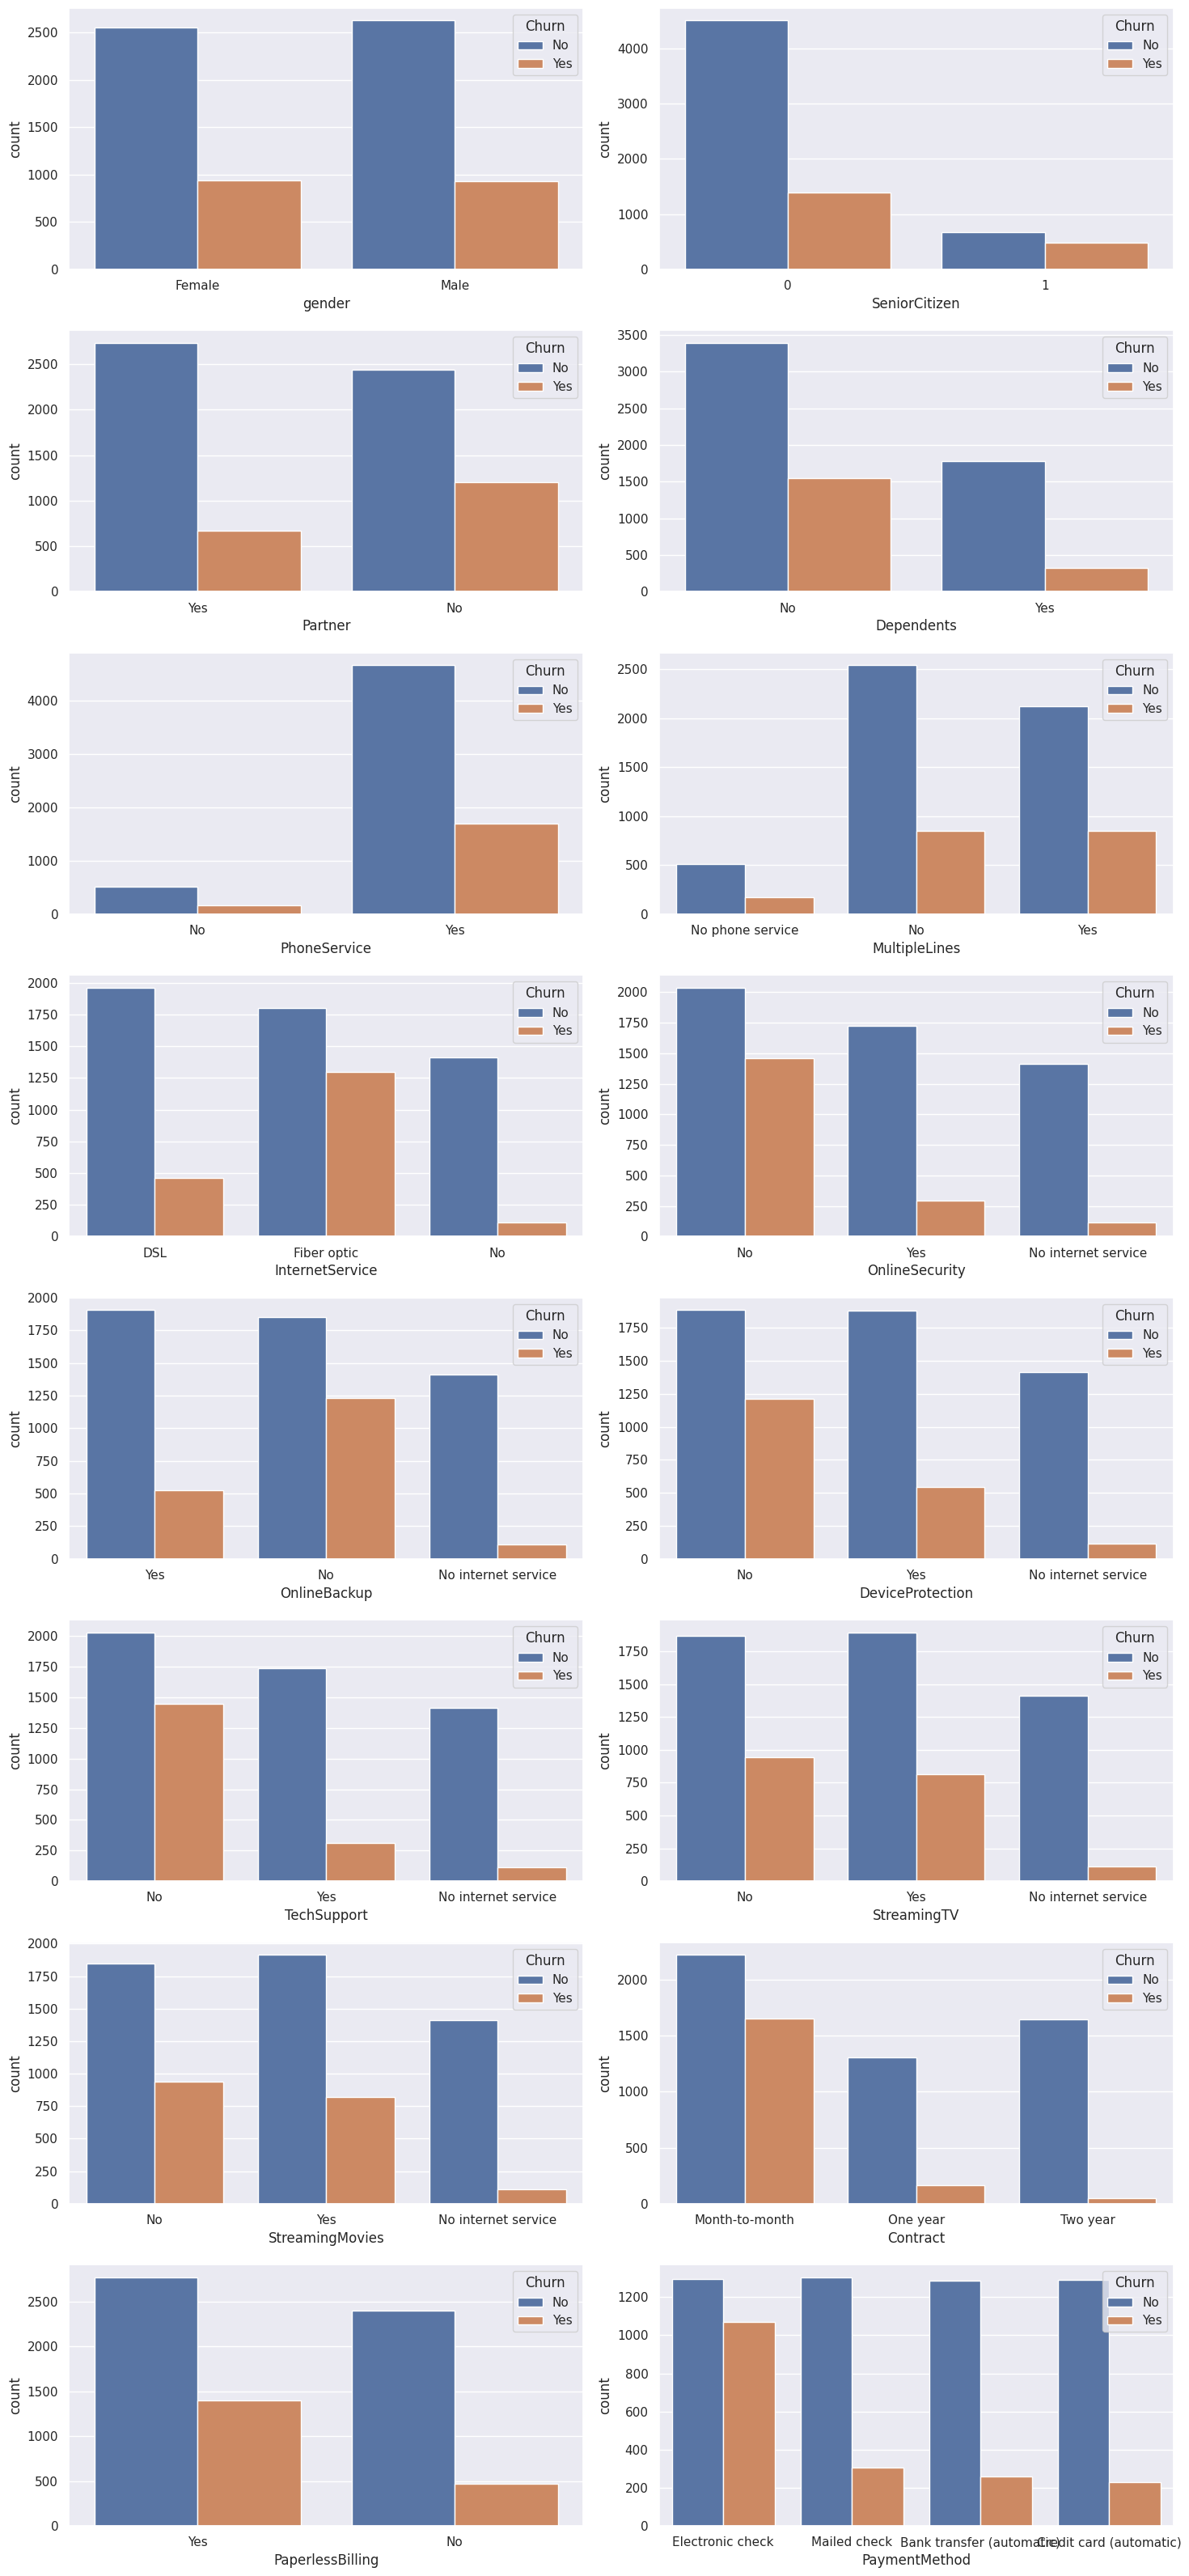

In [ ]:
sns.set(style = 'darkgrid')

fig, ax = plt.subplots(8, 2,
                       figsize = (15,32))

for i, column in enumerate(categorical) :
  row = i // 2  #col num
  col = i % 2   #col num
  sns.countplot(data = df_load,
                x = column,
                hue = 'Churn',
                ax = ax[row][col])

plt.tight_layout()
plt.show()

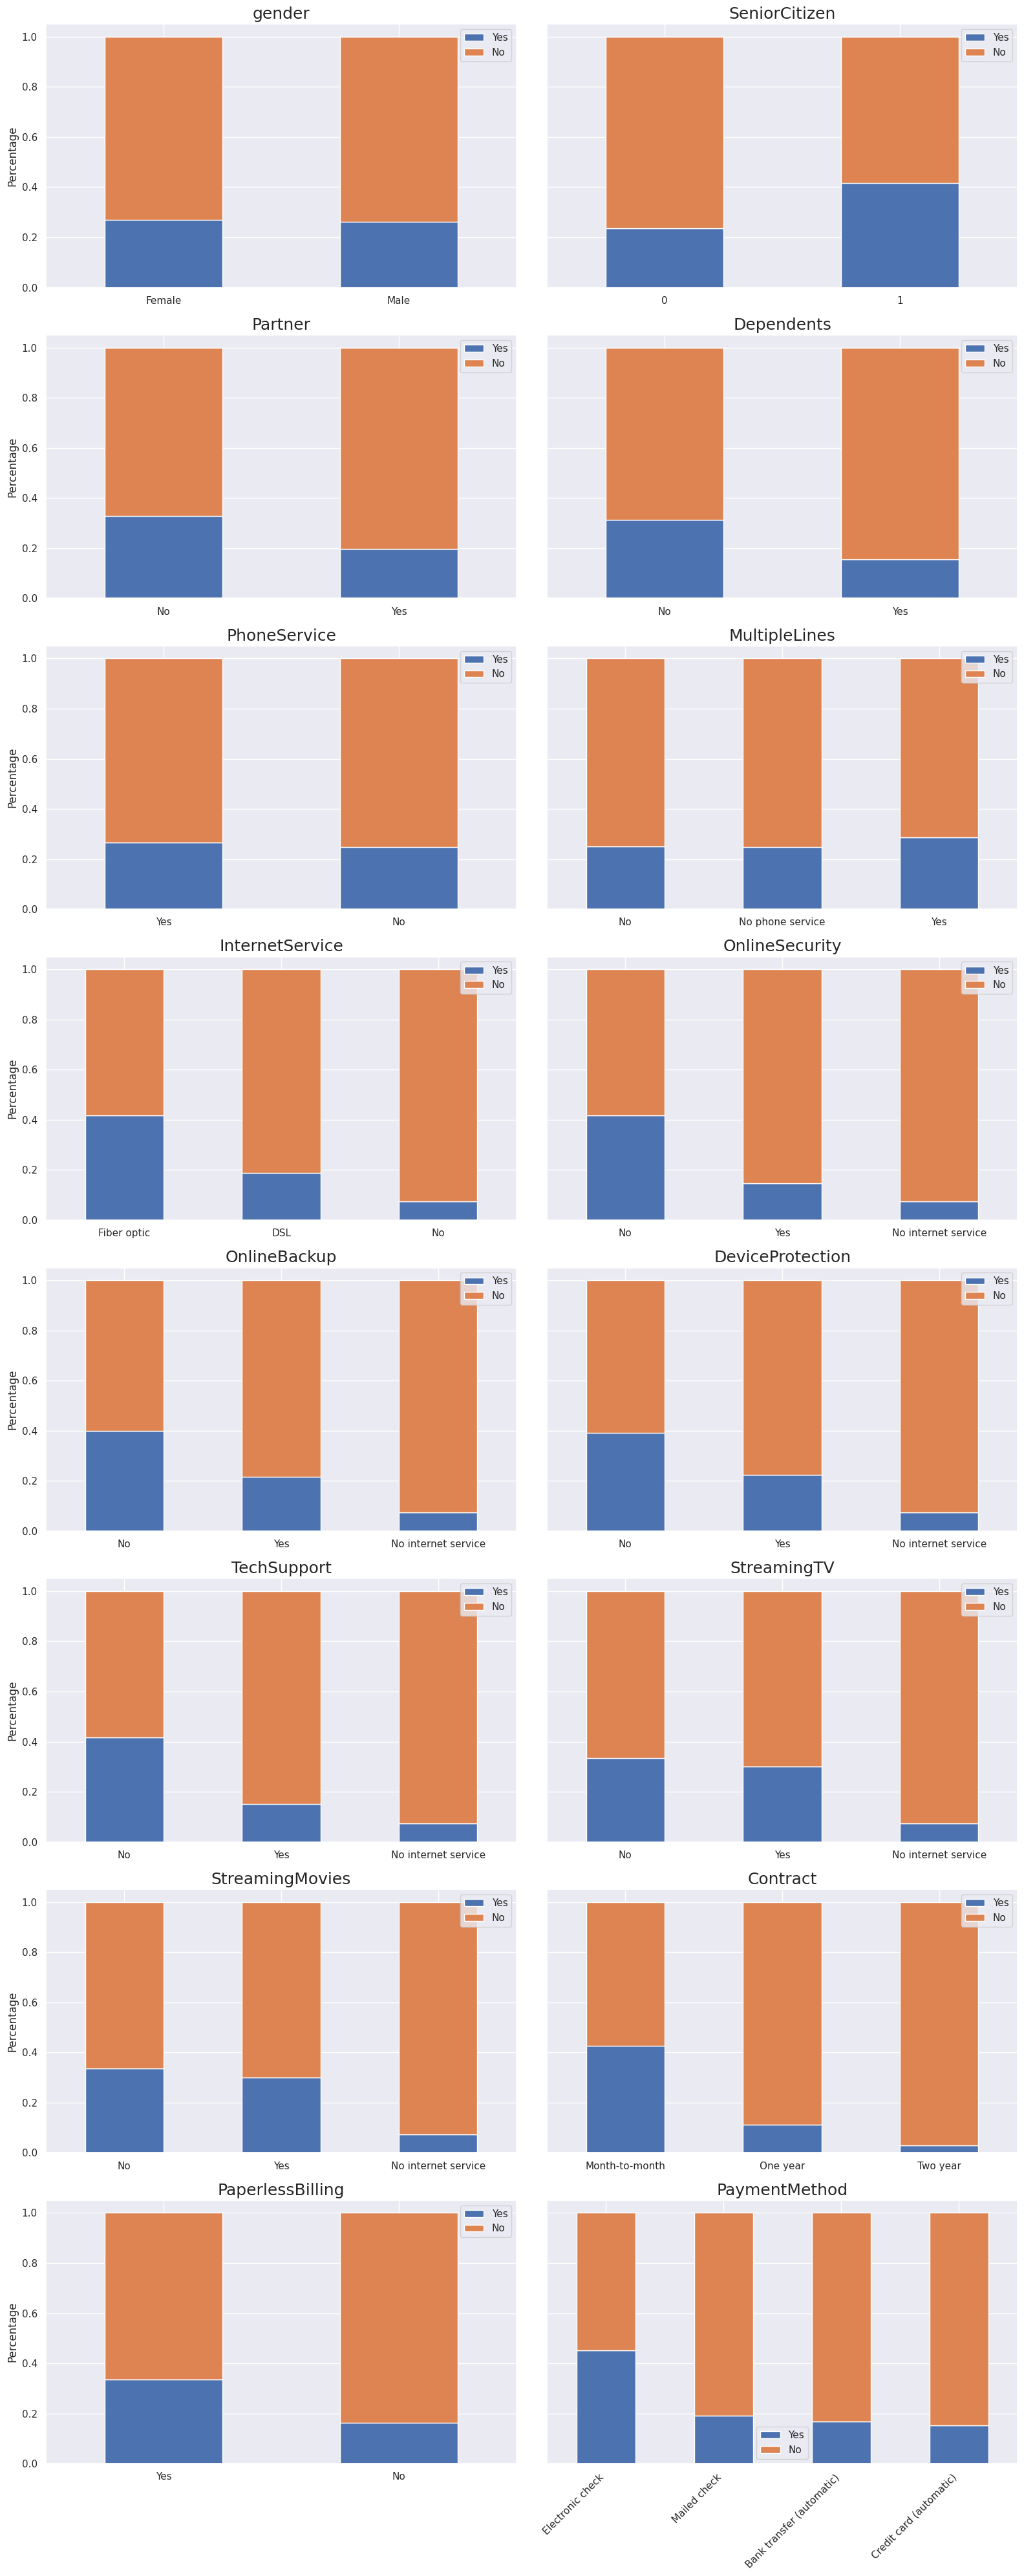

In [ ]:
#Percentage Version
sns.set(style = 'darkgrid')

fig, ax = plt.subplots(8, 2,
                       figsize = (16,40),
                       #sharex=True,
                       sharey=True)

for i, column in enumerate(categorical) :
  row = i // 2  #col num
  col = i % 2   #col num

  cat_counts = df_load[column].value_counts()
  churn_pctg = df_load[df_load['Churn'] == 'Yes'][column].value_counts() / cat_counts
  no_churn_pctg = 1 - churn_pctg

  stacked = pd.DataFrame({'Yes' : churn_pctg,
                          'No' : no_churn_pctg})

  stacked.plot(kind = 'bar',
               stacked = True,
               ax = ax[row][col],
               rot = 0) #x axis ticks would be in vertical alignment if this was not assigned

  ax[row][col].set_title(column,
                         fontsize = 18)
  ax[row][col].set_ylabel('Percentage')

  if i == 15 :
    # Set tick locations and labels for each subplot
    ax[row][col].set_xticks(range(len(cat_counts)))
    ax[row][col].set_xticklabels(cat_counts.index,
                                 rotation = 45,
                                 ha = "right")

plt.subplots_adjust(hspace = 2.5)
plt.tight_layout()
plt.show()

Churn rate doesn't really depends on categories in genders, PhoneService, SteamingTV, StreamingMovies and MultipleLines


Customers most likely to Churn are SeniorCitizen, No Partner, No Dependents, Fiber optic InternetService, No OnlineSecurity, No OnlineBackup
No DeviceProtection, No TechSupport, Month-to-month Contract, Paperless Billing and Electronic Check PaymentMethod.

***Summary***\
Variables that has possibility to affect the customers to churn are :
* SeniorCitizen : Yes
* Partner : No
* Dependents : No
* InternetService : Fiber optic
* OnlineSecurity : No
* OnlineBackup : No
* Device Protection : No
* TechSupport : No
* Contract : Month-to month
* PaperlesBilling : Yes
* PaymentMethod : Electronic Check
* High MonthlyCharges
* Low tenure
* Low TotalCharges


Variables that doesn't affect (or have very low possibility) the customers to churn are :     
* customer ID
* gender
* PhoneService
* StreamingTV
* StreamingMovies
* MultipleLines

##Preprocessing

###Missing Values

In [ ]:
#missing values
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


there are 11 null values on TotalCharges column

related columns are : tenure, MonthlyCharges, and Churn

In [ ]:
df_load[df_load['TotalCharges'].isnull()][['tenure','MonthlyCharges','TotalCharges','Churn']]

,tenure,MonthlyCharges,TotalCharges,Churn
488,0,52.55,NaN,No
753,0,20.25,NaN,No
936,0,80.85,NaN,No
1082,0,25.75,NaN,No
1340,0,56.05,NaN,No
3331,0,19.85,NaN,No
3826,0,25.35,NaN,No
4380,0,20.00,NaN,No
5218,0,19.70,NaN,No
6670,0,73.35,NaN,No


now we know that those values become NaN because tenure values are 0 (new customers). So, we can just fill TotalCharges there with 0

In [ ]:
df_load['TotalCharges'].fillna(0, inplace = True)

In [ ]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##Dropping Unnecessary Columns

* customer ID
* gender
* PhoneService
* StreamingTV
* StreamingMovies
* MultipleLines

In [ ]:
df_clean = df_load.drop(['customerID',
                         'gender',
                         'PhoneService',
                         'StreamingTV',
                         'StreamingMovies',
                         'MultipleLines'],
                        axis = 1)
df_clean.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###Encoding

Machine Learning cant process categorical data, so we have to encode them to numerical data.

OneHotEncoder is always prefered because it give clarity to binary label and LabelEncoder might introduce an ordinal interpretation, but if there are more than 2 unique labels we can use LabelEncoder.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#Binary Columns
binary_cols = ['Partner',           #SeniorCitizen column doesn't need to be encoded because it already as 1 and 0 value
               'Dependents',
               'PaperlessBilling',
               'Churn']

ohe = OneHotEncoder(categories = [['Yes','No']],
                    handle_unknown = 'ignore',
                    sparse = False)

for col in binary_cols :
  y = np.array(df_clean[col]).reshape(-1,1) #reshape to make it 2D array so can be inputted to OHE
  df_clean[col] = ohe.fit_transform(y)

#Categorical Columns
categorical_cols = ['InternetService',
                    'OnlineSecurity',
                    'OnlineBackup',
                    'DeviceProtection',
                    'TechSupport',
                    'Contract',
                    'PaymentMethod']

lenc = LabelEncoder()

for col in categorical_cols :
  df_clean[col] = lenc.fit_transform(df_clean[col])

In [ ]:
df_clean.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1.0,0.0,1,0,0,2,0,0,0,1.0,2,29.85,29.85,0.0
1,0,0.0,0.0,34,0,2,0,2,0,1,0.0,3,56.95,1889.50,0.0
2,0,0.0,0.0,2,0,2,2,0,0,0,1.0,3,53.85,108.15,1.0
3,0,0.0,0.0,45,0,2,0,2,2,1,0.0,0,42.30,1840.75,0.0
4,0,0.0,0.0,2,1,0,0,0,0,0,1.0,2,70.70,151.65,1.0


###Data Splitting

In [ ]:
#predictor and target
x = df_clean.drop('Churn',
                  axis = 1
                  ).copy()
y = df_clean['Churn'].copy()

In [ ]:
#Splitting train and test 70:30
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 19)

In [ ]:
from collections import Counter
Counter(y_train)

Counter({0.0: 3635, 1.0: 1295})

In [ ]:
Counter(y_test)

Counter({1.0: 574, 0.0: 1539})

Churn values are evenly distributed in train and test data

In [ ]:
y_train.shape

(4930,)

###Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#use the MOST SIMPLE way first -> logistic regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

###Evaluation

In [ ]:
y_train_predict = logreg.predict(x_train)
accuracy = (accuracy_score(y_train, y_train_predict))

print("The model performance for training set")
print("--------------------------------------")
print('Accuracy : {:.2f}%'.format(accuracy*100))

y_test_predict = logreg.predict(x_test)
accuracy = (accuracy_score(y_test, y_test_predict))

print('')

print("The model performance for test set")
print("--------------------------------------")
print('Akurasi adalah {:.2f}%'.format(accuracy*100))

The model performance for training set
--------------------------------------
Accuracy : 79.70%

The model performance for test set
--------------------------------------
Akurasi adalah 80.93%


In [ ]:
print((classification_report(y_test, y_test_predict)))

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87      1558
         1.0       0.65      0.58      0.62       555

    accuracy                           0.81      2113
   macro avg       0.76      0.74      0.74      2113
weighted avg       0.80      0.81      0.81      2113



Here's what each section of the classification report means:

* Precision:\
Precision is a measure of how many of the positively labeled instances were correctly predicted. In other words, it's the ratio of true positives to the total predicted positives (true positives + false positives). For class 0.0, the precision is 0.86, and for class 1.0, it's 0.65.

* Recall (Sensitivity):\
Recall measures the ability of the model to correctly identify all positive instances. It's the ratio of true positives to the total actual positives (true positives + false negatives). For class 0.0, the recall is 0.89, and for class 1.0, it's 0.58.

* F1-Score:\
The F1-score is the harmonic mean of precision and recall. It's a single metric that balances both precision and recall, making it useful when you want a trade-off between these two metrics. For class 0.0, the F1-score is 0.87, and for class 1.0, it's 0.62.

* Support:\
Support is the number of actual occurrences of the class in the test set. For class 0.0, the support is 1558, and for class 1.0, it's 555.

* Accuracy:\
Accuracy is the overall proportion of correctly predicted instances (both true positives and true negatives) to the total number of instances. In this case, the accuracy is 0.81, or 81%.

* Macro Avg:\
Macro average calculates the average precision, recall, and F1-score across all classes. In this case, the macro average precision is 0.76, macro average recall is 0.74, and macro average F1-score is 0.74.

* Weighted Avg:\
Weighted average takes into account the number of instances of each class. It calculates the weighted average of precision, recall, and F1-score, where the weights are based on the support of each class. In this case, the weighted average precision is 0.80, weighted average recall is 0.81, and weighted average F1-score is 0.81.

In [ ]:
print((confusion_matrix(y_test, y_test_predict)))

[[1386  172]
 [ 231  324]]


In a confusion matrix, predictions are compared to the actual class labels, resulting in four different categories:

* True Positives (TP): The cases where the model correctly predicted the positive class.
* True Negatives (TN): The cases where the model correctly predicted the negative class.
* False Positives (FP): The cases where the model predicted the positive class, but the actual class was negative.
* False Negatives (FN): The cases where the model predicted the negative class, but the actual class was positive.

* 1386 represents the number of true negatives (TN). This means that there were 1386 instances that were correctly predicted as the negative class.
* 324 represents the number of true positives (TP). This means that there were 324 instances that were correctly predicted as the positive class.
* 231 represents the number of false negatives (FN). This means that 231 instances were actually in the positive class, but the model incorrectly predicted them as the negative class.
* 172 represents the number of false positives (FP). This means that 172 instances were actually in the negative class, but the model incorrectly predicted them as the positive class.

-